In [1]:
import fastf1 
import pandas as pd
import numpy as np

from fastf1 import get_session

import matplotlib.pyplot as plt
import seaborn as sns

fastf1.Cache.enable_cache('E:\School Stuff\F1cache')

In [3]:
new_features = pd.read_csv('new_features_output.csv')

C:\Users\jcf03\AppData\Local\Temp\ipykernel_36700\3134807600.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  new_features = pd.read_csv('new_features_output.csv')


In [4]:
new_features.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,delta_dist_to_ahead,relative_speed_to_ahead,brake_mean_3,throttle_std_3,rpm_std_3,delta_x,delta_y,track_movement,TrackStatus_prev,SCin30
0,2023-11-05 17:03:22.842,0 days 01:02:22.839000,NaN,0.53,0 days 00:00:00,10317.650029,0.0,1,18.0,True,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2023-11-05 17:03:22.880,0 days 01:02:22.877000,NaN,0.53,0 days 00:00:00.038000,10309.100000,0.0,1,18.0,True,...,0.0,0.0,1.000000,0.0,6.045783,0.120360,-0.013449,0.121109,1.0,1.0
2,2023-11-05 17:03:22.956,0 days 01:02:22.953000,NaN,0.53,0 days 00:00:00.114000,10292.000000,0.0,1,18.0,True,...,0.0,0.0,1.000000,0.0,13.060353,0.366146,-0.038887,0.368205,1.0,1.0
3,2023-11-05 17:03:23.080,0 days 01:02:23.077000,NaN,0.53,0 days 00:00:00.238000,10265.650000,0.0,1,18.0,True,...,0.0,0.0,1.000000,0.0,21.888486,0.633854,0.038887,0.635046,1.0,1.0
4,2023-11-05 17:03:23.196,0 days 01:02:23.193000,3.0,0.53,0 days 00:00:00.354000,10241.000000,0.0,1,18.0,False,...,0.0,0.0,0.666667,0.0,25.504722,0.084688,0.380318,0.389632,1.0,1.0


In [5]:
ver_tel = new_features[new_features['Driver'] == 'VER']

In [6]:
ver_tel = ver_tel.sort_values(by=['SessionTime']).copy()

In [7]:
ver_tel = ver_tel.reset_index(drop=True)

In [8]:
ver_tel.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,delta_dist_to_ahead,relative_speed_to_ahead,brake_mean_3,throttle_std_3,rpm_std_3,delta_x,delta_y,track_movement,TrackStatus_prev,SCin30
0,2023-11-05 17:03:22.842,0 days 01:02:22.839000,NaN,0.53,0 days 00:00:00,9950.099977,0.0,1,16.0,True,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2023-11-05 17:03:22.880,0 days 01:02:22.877000,NaN,0.53,0 days 00:00:00.038000,9957.066667,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,407.855041,78.246462,-313.493547,323.110992,1.0,1.0
2,2023-11-05 17:03:22.956,0 days 01:02:22.953000,NaN,0.53,0 days 00:00:00.114000,9971.000000,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,740.126557,77.003080,-304.021806,313.621959,1.0,1.0
3,2023-11-05 17:03:23.080,0 days 01:02:23.077000,NaN,0.53,0 days 00:00:00.238000,9984.433333,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,358.339100,59.000000,-237.000000,244.233495,1.0,1.0
4,2023-11-05 17:03:23.196,0 days 01:02:23.193000,3.0,0.53,0 days 00:00:00.354000,9997.000000,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,406.357396,31.987010,-130.579836,134.440553,1.0,1.0


In [9]:
print(f"Original SCin30 distribution: {ver_tel['SCin30'].value_counts()}")

Original SCin30 distribution: 0.0    42514
1.0      208
Name: SCin30, dtype: int64


In [10]:
safety_car_indices = ver_tel[ver_tel['SCin30'] == 1].index
print(f"Safety car events at indices: {safety_car_indices.tolist()}")

Safety car events at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207]


In [11]:
# Test the first few sequences manually
for seq_start in [0, 25, 50, 75, 100]:
    future_start = seq_start + 600
    future_end = future_start + 150
    if future_end <= len(ver_tel):
        future_window = ver_tel.iloc[future_start:future_end]['SCin30']
        has_safety_car = future_window.any()
        print(f"Sequence {seq_start}: looks at indices {future_start}-{future_end}, has safety car: {has_safety_car}")

Sequence 0: looks at indices 600-750, has safety car: False
Sequence 25: looks at indices 625-775, has safety car: False
Sequence 50: looks at indices 650-800, has safety car: False
Sequence 75: looks at indices 675-825, has safety car: False
Sequence 100: looks at indices 700-850, has safety car: False


In [12]:
for seq_len in [100, 200, 300, 600]:
    X, y = create_sequences(ver_tel, feature_cols, 'SCin30', seq_len)
    print(f"Sequence length {seq_len}: {np.sum(y)} positive samples out of {len(y)} total")

NameError: name 'create_sequences' is not defined

In [27]:
# Check if your data is time-ordered (assuming you have a time column)
print("First few rows of time-related columns:")
print(ver_tel[['Time', 'SCin30']].head(10))  # adjust column names as needed

print("\nLast few rows:")
print(ver_tel[['Time', 'SCin30']].tail(10))

# Check if safety car events are actually at the beginning chronologically
print(f"\nTime range of safety car events:")
safety_car_rows = ver_tel[ver_tel['SCin30'] == 1]
print(f"Safety car time range: {safety_car_rows['Time'].min()} to {safety_car_rows['Time'].max()}")
print(f"Full dataset time range: {ver_tel['Time'].min()} to {ver_tel['Time'].max()}")

First few rows of time-related columns:
                     Time  SCin30
0         0 days 00:00:00     1.0
1  0 days 00:00:00.038000     1.0
2  0 days 00:00:00.114000     1.0
3  0 days 00:00:00.238000     1.0
4  0 days 00:00:00.354000     1.0
5  0 days 00:00:00.478000     1.0
6  0 days 00:00:00.754000     1.0
7  0 days 00:00:00.778000     1.0
8  0 days 00:00:00.994000     1.0
9  0 days 00:00:01.118000     1.0

Last few rows:
                         Time  SCin30
42712  0 days 00:01:12.745000     0.0
42713  0 days 00:01:12.945000     0.0
42714  0 days 00:01:13.034000     0.0
42715  0 days 00:01:13.186000     0.0
42716  0 days 00:01:13.346000     0.0
42717  0 days 00:01:13.435000     0.0
42718  0 days 00:01:13.586000     0.0
42719  0 days 00:01:13.746000     0.0
42720  0 days 00:01:13.774000     0.0
42721  0 days 00:01:13.935000     0.0

Time range of safety car events:
Safety car time range: 0 days 00:00:00 to 0 days 00:00:27.154000
Full dataset time range: 0 days 00:00:00 to 0 days 00

In [13]:
#feature_cols = ['DistanceToDriverAhead', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Z', 'delta_time',
#                'delta_speed', 'delta_throttle', 'delta_brake', 'delta_rpm', 'delta_gear',
#       'acceleration', 'delta_dist_to_ahead', 'relative_speed_to_ahead',
#       'brake_mean_3', 'throttle_std_3', 'rpm_std_3', 'delta_x', 'delta_y', 'track_movement']

feature_cols = ['DistanceToDriverAhead', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Z']

target_col = ['SCin30']

In [14]:
def create_sequences(df, feature_cols, target_col, sequence_length):
    """Predict if safety car will happen within this sequence"""
    X, y = [], []
    for i in range(len(df) - sequence_length + 1):
        seq_x = df.iloc[i:i+sequence_length][feature_cols].values
        # Check if THIS sequence contains any safety car events
        seq_y = int(df.iloc[i:i+sequence_length][target_col].any())
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [15]:
forecast_horizon = 60  # 30 seconds * 10 Hz
X_seq, y_seq = create_sequences(ver_tel, feature_cols, target_col, sequence_length=600)

In [16]:
X_seq.shape

(42123, 600, 9)

In [17]:
unique, counts = np.unique(y_seq, return_counts=True)
print(dict(zip(unique, counts)))

{0: 41915, 1: 208}


In [18]:
X_seq = X_seq.astype(np.float32)
y_seq = y_seq.astype(np.float32)

In [19]:
X_seq = np.nan_to_num(X_seq, nan=0.0, posinf=1e6, neginf=-1e6)

In [20]:
from sklearn.preprocessing import StandardScaler

# Flatten X to 2D (combine sequences and time steps)
num_sequences, seq_len, num_features = X_seq.shape
X_flat = X_seq.reshape(-1, num_features)  # shape: (42692 * 30, 24)

# Fit and transform
scaler = StandardScaler()
X_scaled_flat = scaler.fit_transform(X_flat)

# Reshape back to (42692, 30, 24)
X_scaled = X_scaled_flat.reshape(num_sequences, seq_len, num_features)

In [43]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(X_seq)
train_end = int(n * train_ratio)
val_end = int(n * (train_ratio + val_ratio))

X_train, y_train = X_seq[:train_end], y_seq[:train_end]
X_val, y_val = X_seq[train_end:val_end], y_seq[train_end:val_end]
X_test, y_test = X_seq[val_end:], y_seq[val_end:]

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader

class TelemetrySequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)  # Use long for classification if output is class ID

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Example usage
train_dataset = TelemetrySequenceDataset(X_scaled, y_seq)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [22]:
import torch.nn as nn

class GRUClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.2):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        #self.sigmoid = nn.Sigmoid()  # For binary classification ##NEED TO REMOVE

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # take last time step
        out = self.fc(out)
        return out

In [23]:
model = GRUClassifier(input_dim=9, hidden_dim=64, num_layers=2, output_dim=1)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)              # shape: [batch_size, 1]
        loss = criterion(outputs, y_batch.unsqueeze(1))    # y_batch should be float and same shape
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 26.8619
Epoch 2, Loss: 6.7482
Epoch 3, Loss: 0.7495
Epoch 4, Loss: 0.6693
Epoch 5, Loss: 0.8944
Epoch 6, Loss: 0.2294
Epoch 7, Loss: 0.2406
Epoch 8, Loss: 0.2783
Epoch 9, Loss: 0.2355
Epoch 10, Loss: 1.1642


In [57]:
spgp2022 = pd.read_csv('spgp2022_output.csv')

C:\Users\jcf03\AppData\Local\Temp\ipykernel_36700\1608787867.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  spgp2022 = pd.read_csv('spgp2022_output.csv')


In [58]:
ver_tel_2022 = spgp2022[spgp2022['Driver'] == 'VER']
ver_tel_2022 = ver_tel_2022.sort_values(by=['SessionTime']).copy()

In [59]:
ver_tel_2022 = ver_tel_2022.reset_index(drop=True)

In [60]:
X_seq_2022, y_seq_2022 = create_sequences(ver_tel_2022, feature_cols, target_col, sequence_length=600)

In [61]:
X_seq_2022 = X_seq_2022.astype(np.float32)
y_seq_2022 = y_seq_2022.astype(np.float32)

In [62]:
X_seq_2022 = np.nan_to_num(X_seq_2022, nan=0.0, posinf=1e6, neginf=-1e6)

In [63]:
# Flatten X to 2D (combine sequences and time steps)
num_sequences_2022, seq_len_2022, num_features_2022 = X_seq_2022.shape
X_flat_2022 = X_seq_2022.reshape(-1, num_features_2022)  # shape: (42692 * 30, 24)

# Fit and transform
scaler = StandardScaler()
X_scaled_flat_2022 = scaler.fit_transform(X_flat_2022)

# Reshape back to (42692, 30, 24)
X_scaled_2022 = X_scaled_flat_2022.reshape(num_sequences_2022, seq_len_2022, num_features_2022)

In [64]:
model.eval()
with torch.no_grad():
    logits_preds_2022 = model(torch.tensor(X_scaled_2022, dtype=torch.float32))
    probs_2022 = torch.sigmoid(logits_preds_2022).squeeze().numpy()

from sklearn.metrics import roc_auc_score, accuracy_score

pred_labels_2022 = (probs_2022 > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_seq_2022, pred_labels_2022))
print("ROC AUC:", roc_auc_score(y_seq_2022, probs_2022))

Accuracy: 0.9687034613475337
ROC AUC: 0.6339111220116808


In [20]:
unique, counts = np.unique(y_seq, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 41972}


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_seq_2022, pred_labels_2022, digits=4))

              precision    recall  f1-score   support

         0.0     0.9712    0.9973    0.9841     43047
         1.0     0.0000    0.0000    0.0000      1271

    accuracy                         0.9687     44318
   macro avg     0.4856    0.4987    0.4921     44318
weighted avg     0.9434    0.9687    0.9559     44318



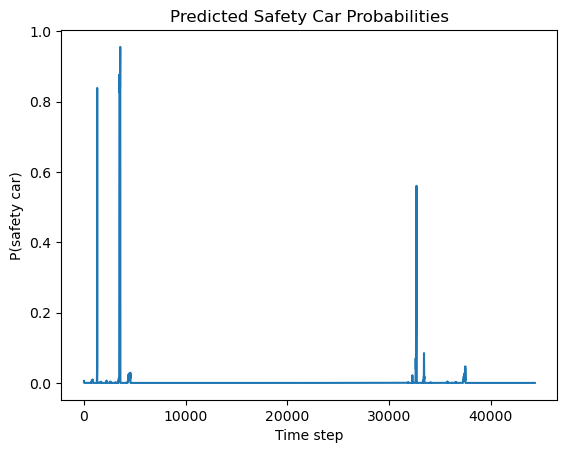

In [66]:
plt.plot(probs_2022, label="Predicted Probability")
plt.title("Predicted Safety Car Probabilities")
plt.ylabel("P(safety car)")
plt.xlabel("Time step")
plt.show()

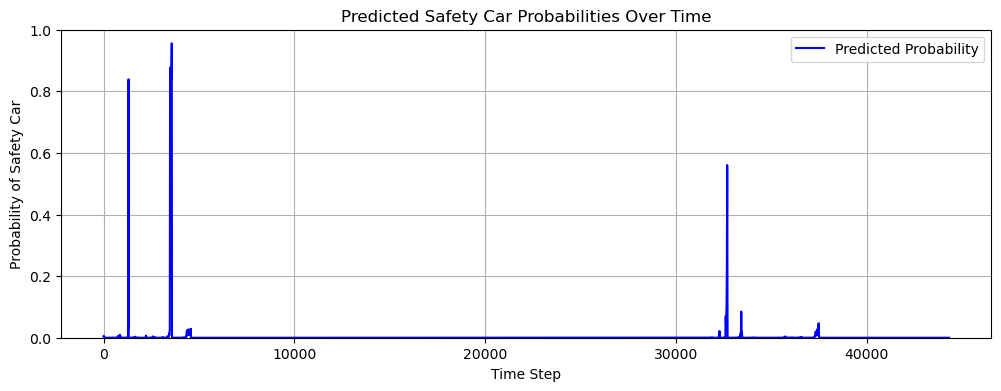

In [67]:
#model.eval()
#with torch.no_grad():
#    logits_preds_2022 = model(torch.tensor(X_scaled_2022, dtype=torch.float32))
#    probs_2022 = torch.sigmoid(logits_preds_2022).squeeze().numpy()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(probs_2022, label="Predicted Probability", color='blue')
plt.title("Predicted Safety Car Probabilities Over Time")
plt.ylabel("Probability of Safety Car")
plt.xlabel("Time Step")
plt.ylim(0, 1)  # Limit y-axis to valid probability range
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Test different thresholds
print("Threshold Analysis:")
print("Thresh\tPrec\tRecall\tF1\tTP\tFP\tFN")
print("-" * 50)

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    pred_labels_thresh = (probs_2022 > threshold).astype(int)
    
    precision = precision_score(y_seq_2022, pred_labels_thresh, zero_division=0)
    recall = recall_score(y_seq_2022, pred_labels_thresh, zero_division=0)
    f1 = f1_score(y_seq_2022, pred_labels_thresh, zero_division=0)
    
    # Calculate TP, FP, FN for insight
    tp = np.sum((pred_labels_thresh == 1) & (y_seq_2022 == 1))
    fp = np.sum((pred_labels_thresh == 1) & (y_seq_2022 == 0))
    fn = np.sum((pred_labels_thresh == 0) & (y_seq_2022 == 1))
    
    print(f"{threshold:.1f}\t{precision:.3f}\t{recall:.3f}\t{f1:.3f}\t{tp}\t{fp}\t{fn}")

# Also check the distribution of your probabilities
print(f"\nProbability distribution:")
print(f"Mean: {probs_2022.mean():.4f}")
print(f"Max: {probs_2022.max():.4f}")
print(f"Min: {probs_2022.min():.4f}")
print(f"Std: {probs_2022.std():.4f}")

# Count how many predictions are above various thresholds
print(f"\nPredictions above threshold:")
for thresh in [0.1, 0.3, 0.5, 0.7, 0.9]:
    count = np.sum(probs_2022 > thresh)
    print(f">{thresh}: {count} predictions")

Threshold Analysis:
Thresh	Prec	Recall	F1	TP	FP	FN
--------------------------------------------------
0.1	0.000	0.000	0.000	0	163	1271
0.2	0.000	0.000	0.000	0	144	1271
0.3	0.000	0.000	0.000	0	133	1271
0.4	0.000	0.000	0.000	0	126	1271
0.5	0.000	0.000	0.000	0	116	1271
0.6	0.000	0.000	0.000	0	103	1271
0.7	0.000	0.000	0.000	0	100	1271

Probability distribution:
Mean: 0.0028
Max: 0.9557
Min: 0.0000
Std: 0.0432

Predictions above threshold:
>0.1: 163 predictions
>0.3: 133 predictions
>0.5: 116 predictions
>0.7: 100 predictions
>0.9: 13 predictions


In [69]:
# Where are your actual safety car events in the 2022 test data?
safety_car_indices = np.where(y_seq_2022 == 1)[0]
print(f"Actual safety car sequences at indices: {safety_car_indices[:20]}...")

# Where is your model predicting high probabilities?
high_prob_indices = np.where(probs_2022 > 0.5)[0]
print(f"High probability predictions at indices: {high_prob_indices[:20]}...")

# Check for overlap
overlap = np.intersect1d(safety_car_indices, high_prob_indices)
print(f"Overlapping predictions: {len(overlap)} out of {len(safety_car_indices)} actual events")

Actual safety car sequences at indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]...
High probability predictions at indices: [1301 1302 1303 1304 3471 3472 3473 3474 3475 3476 3477 3478 3479 3480
 3481 3482 3483 3484 3485 3486]...
Overlapping predictions: 0 out of 1271 actual events


In [70]:
safety_car_indices_2022 = ver_tel_2022[ver_tel_2022['SCin30'] == 1].index
print(f"Safety car events at indices: {safety_car_indices_2022.tolist()}")

Safety car events at indices: [221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414,

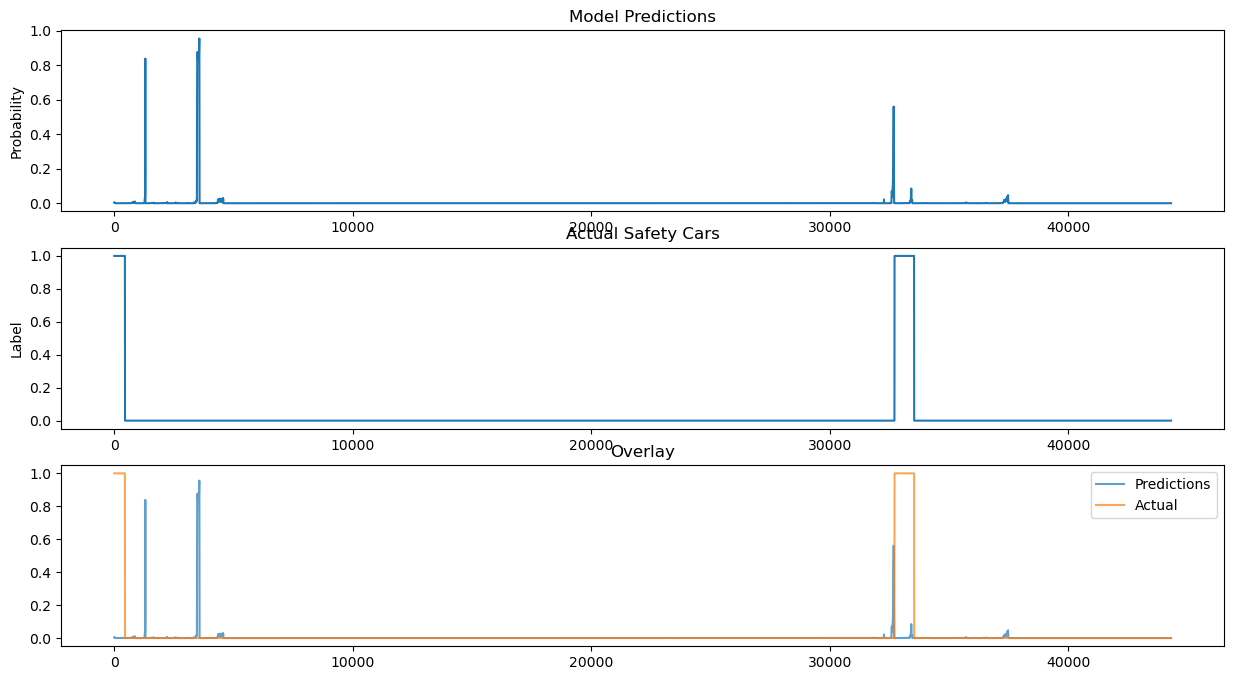

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(probs_2022)
plt.title('Model Predictions')
plt.ylabel('Probability')

plt.subplot(3, 1, 2)
plt.plot(y_seq_2022)
plt.title('Actual Safety Cars')
plt.ylabel('Label')

plt.subplot(3, 1, 3)
plt.plot(probs_2022, alpha=0.7, label='Predictions')
plt.plot(y_seq_2022, alpha=0.7, label='Actual')
plt.title('Overlay')
plt.legend()
plt.show()

In [72]:
print(f"Total safety car events in 2022 test: {np.sum(y_seq_2022)}")
print(f"Safety car events (FN): {1271}")  # From your metrics

Total safety car events in 2022 test: 1271.0
Safety car events (FN): 1271


In [74]:
# Check your sequence creation process
print(f"Original 2022 data shape: {ver_tel_2022.shape}")
print(f"Reindexed 2022 data shape: {ver_tel_2022.shape}")
print(f"Generated sequences shape: {X_scaled_2022.shape}")
print(f"Generated labels shape: {y_seq_2022.shape}")
print(f"Safety car distribution: {np.bincount(y_seq_2022.astype(int))}")

Original 2022 data shape: (44917, 37)
Reindexed 2022 data shape: (44917, 37)
Generated sequences shape: (44318, 600, 9)
Generated labels shape: (44318,)
Safety car distribution: [43047  1271]


In [76]:
safety_events_original = ver_tel_2022[ver_tel_2022['SCin30'] == 1].index
safety_events_reset = ver_tel_2022[ver_tel_2022['SCin30'] == 1].index

print(f"Safety events in original DF: {safety_events_original[:10].tolist()}")
print(f"Safety events in reset DF: {safety_events_reset[:10].tolist()}")

Safety events in original DF: [221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
Safety events in reset DF: [221, 222, 223, 224, 225, 226, 227, 228, 229, 230]


In [77]:
# Find where your model is most confident
high_confidence_indices = np.where(probs_2022 > 0.8)[0]
print(f"Model's highest confidence predictions at indices: {high_confidence_indices}")

# Find where actual safety cars are
actual_safety_indices = np.where(y_seq_2022 == 1)[0]
print(f"First 20 actual safety car indices: {actual_safety_indices[:20]}")
print(f"Last 20 actual safety car indices: {actual_safety_indices[-20:]}")

# Check the time gap between them
if len(high_confidence_indices) > 0 and len(actual_safety_indices) > 0:
    print(f"Model predicts around timestep: {high_confidence_indices[0]}")
    print(f"First actual safety car at: {actual_safety_indices[0]}")
    print(f"Gap: {actual_safety_indices[0] - high_confidence_indices[0]} timesteps")

# Also check the specific probabilities at actual safety car locations
safety_car_probs = probs_2022[actual_safety_indices[:10]]
print(f"Model probabilities at first 10 actual safety car locations: {safety_car_probs}")

Model's highest confidence predictions at indices: [1302 1303 3479 3480 3481 3482 3483 3484 3485 3486 3487 3488 3489 3490
 3491 3492 3493 3494 3495 3496 3497 3498 3499 3500 3501 3502 3503 3504
 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518
 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532
 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546
 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560
 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570]
First 20 actual safety car indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Last 20 actual safety car indices: [33521 33522 33523 33524 33525 33526 33527 33528 33529 33530 33531 33532
 33533 33534 33535 33536 33537 33538 33539 33540]
Model predicts around timestep: 1302
First actual safety car at: 0
Gap: -1302 timesteps
Model probabilities at first 10 actual safety car locations: [0.00465483 0.00495891 0.00531581 0.00568144 0.00599074 0.0060212


In [78]:
high_confidence_indices = np.where(probs_2022 > 0.8)[0]
actual_safety_indices = np.where(y_seq_2022 == 1)[0]

print(f"Model's high confidence predictions: {high_confidence_indices}")
print(f"Actual SCin30 labels: {actual_safety_indices[:10]}")

# Check if model is detecting DURING safety car instead of BEFORE
# If there's a systematic offset, we can measure it
if len(high_confidence_indices) > 0:
    # Find the closest actual safety car event to each prediction
    for pred_idx in high_confidence_indices[:5]:
        distances = np.abs(actual_safety_indices - pred_idx)
        closest_actual = actual_safety_indices[np.argmin(distances)]
        offset = pred_idx - closest_actual
        print(f"Prediction at {pred_idx}, closest actual at {closest_actual}, offset: {offset}")

Model's high confidence predictions: [1302 1303 3479 3480 3481 3482 3483 3484 3485 3486 3487 3488 3489 3490
 3491 3492 3493 3494 3495 3496 3497 3498 3499 3500 3501 3502 3503 3504
 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518
 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532
 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546
 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560
 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570]
Actual SCin30 labels: [0 1 2 3 4 5 6 7 8 9]
Prediction at 1302, closest actual at 447, offset: 855
Prediction at 1303, closest actual at 447, offset: 856
Prediction at 3479, closest actual at 447, offset: 3032
Prediction at 3480, closest actual at 447, offset: 3033
Prediction at 3481, closest actual at 447, offset: 3034


In [79]:
offset = 855  # Use the consistent offset we found
adjusted_probs = np.zeros_like(probs_2022)

# Shift predictions backward by the offset
if offset < len(probs_2022):
    adjusted_probs[:-offset] = probs_2022[offset:]

# Test the adjusted predictions
for threshold in [0.3, 0.5, 0.7]:
    pred_labels_adjusted = (adjusted_probs > threshold).astype(int)
    precision = precision_score(y_seq_2022, pred_labels_adjusted, zero_division=0)
    recall = recall_score(y_seq_2022, pred_labels_adjusted, zero_division=0)
    f1 = f1_score(y_seq_2022, pred_labels_adjusted, zero_division=0)
    
    tp = np.sum((pred_labels_adjusted == 1) & (y_seq_2022 == 1))
    fp = np.sum((pred_labels_adjusted == 1) & (y_seq_2022 == 0))
    fn = np.sum((pred_labels_adjusted == 0) & (y_seq_2022 == 1))
    
    print(f"Offset-corrected Threshold {threshold}: P={precision:.3f}, R={recall:.3f}, F1={f1:.3f}, TP={tp}")

print(f"\nAdjusted ROC AUC: {roc_auc_score(y_seq_2022, adjusted_probs):.4f}")

Offset-corrected Threshold 0.3: P=0.023, R=0.002, F1=0.004, TP=3
Offset-corrected Threshold 0.5: P=0.017, R=0.002, F1=0.003, TP=2
Offset-corrected Threshold 0.7: P=0.010, R=0.001, F1=0.001, TP=1

Adjusted ROC AUC: 0.5922
